In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
movies = pd.read_csv('data/tmdb_5000_movies.csv')
credits = pd.read_csv('data/tmdb_5000_credits.csv')

In [3]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [4]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [5]:
movies = movies.merge(credits, on='title')

In [6]:
movies.shape

(4809, 23)

In [7]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [8]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

<Axes: ylabel='count'>

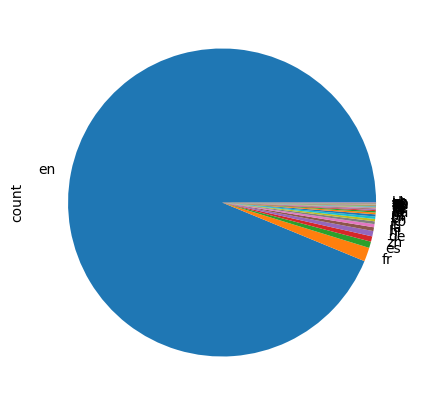

In [9]:
movies['original_language'].value_counts().plot.pie(figsize=(5,5))

In [10]:
movies = movies[['genres', 'id', 'keywords', 'overview', 'production_companies', 'release_date', 
 'title', 'cast', 'crew']]

In [11]:
movies.head(1)

,genres,id,keywords,overview,production_companies,release_date,title,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [12]:
movies.isnull().sum()

genres                  0
id                      0
keywords                0
overview                3
production_companies    0
release_date            1
title                   0
cast                    0
crew                    0
dtype: int64

In [13]:
movies.dropna(inplace=True)

In [14]:
movies.duplicated().sum()

np.int64(0)

In [15]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [16]:
import ast
def fetch_data(obj):
    data = []
    for i in ast.literal_eval(obj):
        data.append(i['name'])
    return data

In [17]:
movies['genres'] = movies['genres'].apply(fetch_data)

In [18]:
movies['keywords'] = movies['keywords'].apply(fetch_data)

In [19]:
movies['production_companies'] = movies['production_companies'].apply(fetch_data)

In [20]:
def fetch_data2(obj):
    data = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 5:
            data.append(i['name'])
            counter+=1
        else:
            break
    return data

In [21]:
movies['cast'] = movies['cast'].apply(fetch_data2)

In [22]:
movies.iloc[0].crew

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [23]:
def fetch_data3(obj):
    data = []
    job = 'Director'
    for i in ast.literal_eval(obj):
        if i['job'] == job:
            data.append(i['name'])
            break
    return data

In [24]:
movies['crew'] = movies['crew'].apply(fetch_data3)

In [25]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [26]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [27]:
movies['release_date'] = pd.to_datetime(movies['release_date']).dt.year

In [28]:
movies['release_date'] = movies['release_date'].astype(str)

In [29]:
movies['release_date'] = movies['release_date'].apply(lambda x:x.split())

In [30]:
movies.head(1)

,genres,id,keywords,overview,production_companies,release_date,title,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Ingenious Film Partners, Twentieth Century Fo...",[2009],Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]


In [31]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ", '') for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ", '') for i in x])
movies['production_companies'] = movies['production_companies'].apply(lambda x:[i.replace(" ", '') for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ", '') for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ", '') for i in x])

In [32]:
movies.head(1)

,genres,id,keywords,overview,production_companies,release_date,title,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[IngeniousFilmPartners, TwentiethCenturyFoxFil...",[2009],Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]


In [33]:
movies['tags'] = movies['genres'] + movies['keywords'] + movies['overview'] + movies['production_companies'] + movies['release_date'] + movies['cast'] + movies['crew']

In [34]:
movies.columns

Index(['genres', 'id', 'keywords', 'overview', 'production_companies',
       'release_date', 'title', 'cast', 'crew', 'tags'],
      dtype='object')

In [35]:
new_df = movies[['id', 'title', 'tags']]

In [36]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

In [37]:
new_df['tags'][0]

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. IngeniousFilmPartners TwentiethCenturyFoxFilmCorporation DuneEntertainment LightstormEntertainment 2009 SamWorthington ZoeSaldana SigourneyWeaver StephenLang MichelleRodriguez JamesCameron'

In [38]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

In [39]:
import nltk

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [41]:
def stem(text):
    stemmed = []
    for i in text.split():
        stemmed.append(ps.stem(i))
    return " ".join(stemmed)

In [42]:
new_df['tags'] = new_df['tags'].apply(stem)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [44]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [45]:
list(cv.get_feature_names_out())

['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '1492pictur',
 '15',
 '16',
 '17',
 '18',
 '18th',
 '19',
 '1910',
 '1920',
 '1930',
 '1940',
 '1944',
 '1945',
 '1950',
 '1950s',
 '1955',
 '1959',
 '1960',
 '1960s',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '20th',
 '21lapsentertain',
 '24',
 '25',
 '2929product',
 '30',
 '300',
 '3artsentertain',
 '3d',
 '40',
 '40acres',
 '50',
 '500',
 '60',
 '70',
 'a24',
 'aaron',
 'aaroneckhart',
 'aarontaylor',
 'abandon',
 'abduct',
 'abi

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
similarity = cosine_similarity(vectors)

In [48]:
similarity.shape

(4805, 4805)

In [49]:
new_df[new_df['title'] == 'Avatar'].index[0]

np.int64(0)

In [50]:
sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x:x[1])[1:6]

[(1214, np.float64(0.30454410465750786)),
 (507, np.float64(0.26210529752729134)),
 (539, np.float64(0.25334729596907)),
 (778, np.float64(0.2527015890855968)),
 (2405, np.float64(0.25058312895083307))]

In [51]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:6]

    for i in movies_list:
        print (new_df.iloc[i[0]].title)

In [52]:
recommend('Batman Begins')

The Dark Knight
Batman
The Dark Knight Rises
Batman
Batman v Superman: Dawn of Justice


In [53]:
import pickle

In [54]:
pickle.dump(new_df.to_dict(), open('movie_dict.pkl', 'wb'))

In [55]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))